In [4]:
from Bio import SeqIO
from collections import Counter

seqX = SeqIO.read('x.fasta', 'fasta').seq
seqY = SeqIO.read('y.fasta', 'fasta').seq

print(Counter(seqX))
print(Counter(seqY))

Counter({'G': 524, 'C': 515, 'A': 462, 'T': 364, 'N': 18})
Counter({'C': 315, 'G': 286, 'A': 234, 'T': 215})


In [5]:
seqX = seqX.replace('N', '')
print(Counter(seqX))

Counter({'G': 524, 'C': 515, 'A': 462, 'T': 364})


In [6]:
print(f"Length of Sequence X = {len(seqX)}")
print(f"Length of Sequence Y = {len(seqY)}")
print(f"Total length of Sequence X and Y = {len(seqX) + len(seqY)}")

Length of Sequence X = 1865
Length of Sequence Y = 1050
Total length of Sequence X and Y = 2915


In [7]:
print(f"Codon CGC firstly appears in Sequence X at index = {seqX.find('CGC')}")
print(f"Codon CGC firstly appears in Sequence Y at index = {seqY.find('CGC')}")

Codon CGC firstly appears in Sequence X at index = 51
Codon CGC firstly appears in Sequence Y at index = 39


In [8]:
zx = seqX[:10] + seqX[-5:]
zy = seqY[:20] + seqY[-3:]
seqZ = zx + zy
seqZ = seqZ[::-1]

print(f"Sequence Z = {seqZ}")

Sequence Z = CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA


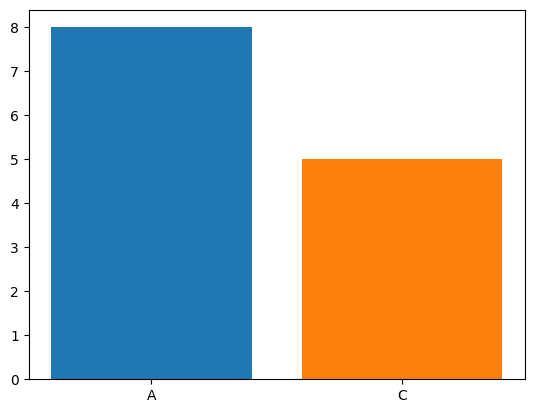

In [14]:
import matplotlib.pyplot as plt

count = Counter(seqZ)
plt.bar('A', count['A'])
plt.bar('C', count['C'])
plt.show()

In [15]:
from Bio.SeqUtils import gc_fraction as GC

GC_percentage = GC(seqZ) * 100
AT_percentage = 100 - GC_percentage

print(f"GC percentage in Sequence Z = {GC_percentage}%")
print(f"AT percentage in Sequence Z = {AT_percentage}%")

GC percentage in Sequence Z = 50.0%
AT percentage in Sequence Z = 50.0%


In [16]:
from Bio.SeqUtils import MeltingTemp

wallace_mt = MeltingTemp.Tm_Wallace(seqZ)
print(f"Melting temperature of Sequence Z = {wallace_mt}")

Melting temperature of Sequence Z = 114.0


In [17]:
from Bio.SeqUtils import molecular_weight

mw = molecular_weight(seqZ)
print(f"Molecular weight of Sequence Z = {mw}")

Molecular weight of Sequence Z = 11924.584100000002


In [18]:
mRNA = seqZ.transcribe()
print(f"mRNA = {mRNA}")

mRNA = CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA


In [20]:
from Bio.SeqUtils import seq3

amino_acids = seqZ.translate()
print(f"Amino acids = {amino_acids}")
print(f"Amino acids = {seq3(amino_acids)}")

Amino acids = QTVSR*L*LRLW
Amino acids = GlnThrValSerArgTerLeuTerLeuArgLeuTrp


In [22]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

local_alignment = pairwise2.align.localxx(seqX, seqY)

for alignment in local_alignment:
    print(format_alignment(*alignment))

6 GTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--G-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGAGGTGGGCTCCCACGGCCGG-GACAC

In [23]:
global_alignment = pairwise2.align.globalxx(seqY, seqZ)

for alignment in global_alignment:
    print(format_alignment(*alignment))

GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCCGAAAGAGATCGAAGGTCTGGAAGAACGCCTGAAATCGCGTTTCGGCTGGGGCCTGACTGTTGCAGTAGAGCCGCCGGAGCTCG

In [24]:
def hamming_distance(seqA, seqB):
    count = 0
    for i,j in zip(seqA, seqB):
        if i != j:
            count += 1
    return count

print(f"Hamming distance between Sequence X and Y = {hamming_distance(seqX, seqY)}")

Hamming distance between Sequence X and Y = 755


In [25]:
import Levenshtein

print(f"Levenshtein distance between Sequence X and Y = {Levenshtein.distance(seqX, seqY)}")

Levenshtein distance between Sequence X and Y = 1028
